## BIA Tischi demo
BIA Tischi is a Jupyter-magic based assistant for interacting with data via code

In [1]:
import numpy as np
from bia_tischi import bob, xbob, cbob, vars, populate_next_cell
from bia_tischi._machinery import _context

%cbob print hello world!

Initializing new AI assistant.
Agent and context initialised.


Plan:

1. Use print function to print "Hello World!" on to the console.

Code was generated and pasted.

In [ ]:
print("Hello World!")

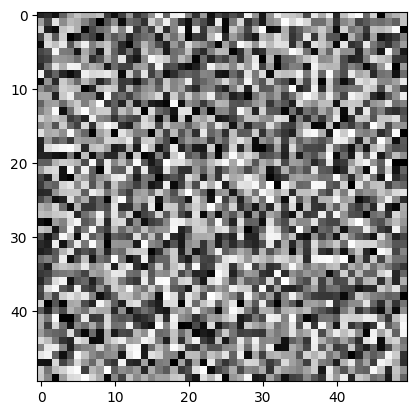

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a small random image (for example 50x50), data should be in the range of 0 and 255.
image = np.random.randint(0, 256, (50, 50))

# Use matplotlib to display the image.
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
print("Hello World!")

In [3]:
print("Hello World!")

Hello World!


In [ ]:

# This is some custom code
def hello_world():
    print("Hello, World!")
    

In [ ]:

# This is some custom code
def hello_world():
    print("Hello, World!")
    

It works using the `%tischi` and `%%tischi` magic commands. Just enter tasks and ask questions. Hint: if you want to ask a question, you need to put a space before the `?`.

In [ ]:
%tischi measure mean_intensity and major axis length of the objects in the input_image using the label_image as labels. Store the result in a dataframe called df